# ***The Spark Foundation***

## **Exploratory data analysis - Retail**

#### **Dataset link - https://bit.ly/3i4rbWl**

#### **Name of the author - Sayali Redasani**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings as wg
wg.filterwarnings("ignore")

import matplotlib.lines as lines
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
df = pd.read_csv("SampleSuperstore.csv")

In [3]:
df.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [4]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [5]:
df.shape

(9994, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [8]:
# Checking for duplicate values
df.duplicated().sum()

17

In [9]:
# Dropping the duplicate values
df.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [10]:
df.shape

(9994, 13)

In [11]:
print(" Segment unique values : ", df["Segment"].unique())
print(" Country unique values : ", df["Country"].unique())
print(" City unique values : ", df["City"].unique())
print(" State unique values: ", df["State"].unique())
print(" Region unique values: ", df["Region"].unique())
print(" Category unique values: ", df["Category"].unique())
print(" Sub-category unique values: ", df["Sub-Category"].unique())

 Segment unique values :  ['Consumer' 'Corporate' 'Home Office']
 Country unique values :  ['United States']
 City unique values :  ['Henderson' 'Los Angeles' 'Fort Lauderdale' 'Concord' 'Seattle'
 'Fort Worth' 'Madison' 'West Jordan' 'San Francisco' 'Fremont'
 'Philadelphia' 'Orem' 'Houston' 'Richardson' 'Naperville' 'Melbourne'
 'Eagan' 'Westland' 'Dover' 'New Albany' 'New York City' 'Troy' 'Chicago'
 'Gilbert' 'Springfield' 'Jackson' 'Memphis' 'Decatur' 'Durham' 'Columbia'
 'Rochester' 'Minneapolis' 'Portland' 'Saint Paul' 'Aurora' 'Charlotte'
 'Orland Park' 'Urbandale' 'Columbus' 'Bristol' 'Wilmington' 'Bloomington'
 'Phoenix' 'Roseville' 'Independence' 'Pasadena' 'Newark' 'Franklin'
 'Scottsdale' 'San Jose' 'Edmond' 'Carlsbad' 'San Antonio' 'Monroe'
 'Fairfield' 'Grand Prairie' 'Redlands' 'Hamilton' 'Westfield' 'Akron'
 'Denver' 'Dallas' 'Whittier' 'Saginaw' 'Medina' 'Dublin' 'Detroit'
 'Tampa' 'Santa Clara' 'Lakeville' 'San Diego' 'Brentwood' 'Chapel Hill'
 'Morristown' 'Cincinna

#### Data is of US region only. State and Region column will give complete idea of Region. Whereas, Postal Code and Shipping Details columns doesn't contribute to Analysis so dropping the same.

In [12]:
df = df.drop(columns = ["Country", "Ship Mode", "Postal Code"])

In [13]:
df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [14]:
df["Segment"].value_counts().to_frame()

,Segment
Consumer,5191
Corporate,3020
Home Office,1783


In [15]:
df["State"].value_counts().to_frame()

,State
California,2001
New York,1128
Texas,985
Pennsylvania,587
Washington,506
Illinois,492
Ohio,469
Florida,383
Michigan,255
North Carolina,249


In [16]:
df["City"].value_counts().to_frame()

,City
New York City,915
Los Angeles,747
Philadelphia,537
San Francisco,510
Seattle,428
...,...
Glenview,1
Missouri City,1
Rochester Hills,1
Palatine,1


In [17]:
df["Region"].value_counts().to_frame()

,Region
West,3203
East,2848
Central,2323
South,1620


In [18]:
df["Category"].value_counts().to_frame()

,Category
Office Supplies,6026
Furniture,2121
Technology,1847


In [19]:
df["Sub-Category"].value_counts().to_frame()

,Sub-Category
Binders,1523
Paper,1370
Furnishings,957
Phones,889
Storage,846
Art,796
Accessories,775
Chairs,617
Appliances,466
Labels,364


In [20]:
state_code = {'Alabama': 'AL','Alaska': 'AK','Arizona': 'AZ','Arkansas': 'AR','California': 'CA','Colorado': 'CO',
              'Connecticut': 'CT','Delaware': 'DE','Florida': 'FL','Georgia': 'GA','Hawaii': 'HI','Idaho': 'ID',
              'Illinois': 'IL','Indiana': 'IN','Iowa': 'IA','Kansas': 'KS','Kentucky': 'KY','Louisiana': 'LA',
              'Maine': 'ME','Maryland': 'MD','Massachusetts': 'MA','Michigan': 'MI','Minnesota': 'MN',
              'Mississippi': 'MS','Missouri': 'MO','Montana': 'MT','Nebraska': 'NE','Nevada': 'NV',
              'New Hampshire': 'NH','New Jersey': 'NJ','New Mexico': 'NM','New York': 'NY','North Carolina': 'NC',
              'North Dakota': 'ND','Ohio': 'OH','Oklahoma': 'OK','Oregon': 'OR','Pennsylvania': 'PA',
              'Rhode Island': 'RI','South Carolina': 'SC','South Dakota': 'SD','Tennessee': 'TN','Texas': 'TX','Utah': 'UT',
              'Vermont': 'VT','Virginia': 'VA','District of Columbia': 'WA','Washington': 'WA','West Virginia': 'WV',
              'Wisconsin': 'WI','Wyoming': 'WY'}
df['state_code'] = df.State.apply(lambda x: state_code[x])

In [21]:
state_data = df[['Profit', 'state_code']].groupby(['state_code']).sum()
fig = go.Figure(data=go.Choropleth(
    locations=state_data.index,
    z = state_data.Profit,
    locationmode = 'USA-states',
    colorscale = 'YlOrRd',
    colorbar_title = 'Profit in USA'))
fig.update_layout(
    title_text = 'Total State-Wise Profit',
    geo_scope='usa',)
fig.show();

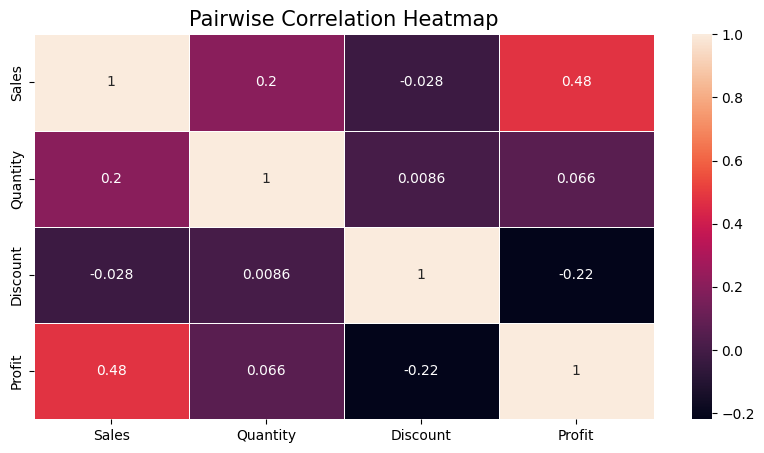

In [24]:
# Select numeric columns for correlation
numeric_data = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Create a heatmap for visualization
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='rocket', linewidths=0.5)
plt.title('Pairwise Correlation Heatmap', fontsize=15)
plt.show()

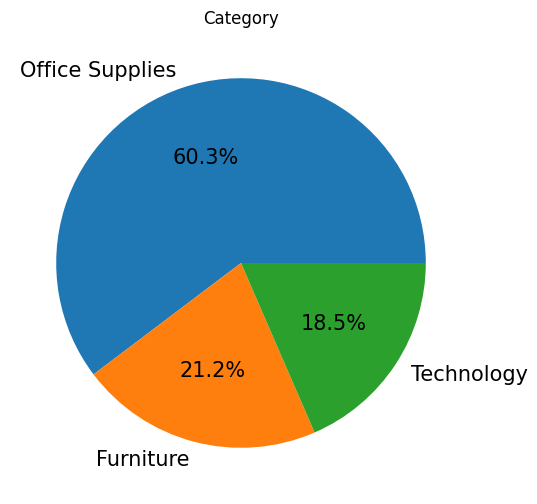

In [26]:
plt.figure(figsize = (6,6))
textprops = {"fontsize":15}
plt.title('Category')
plt.pie(df['Category'].value_counts(), labels=df['Category'].value_counts().index,autopct='%1.1f%%',textprops = textprops)
plt.show()

<Figure size 1000x600 with 0 Axes>

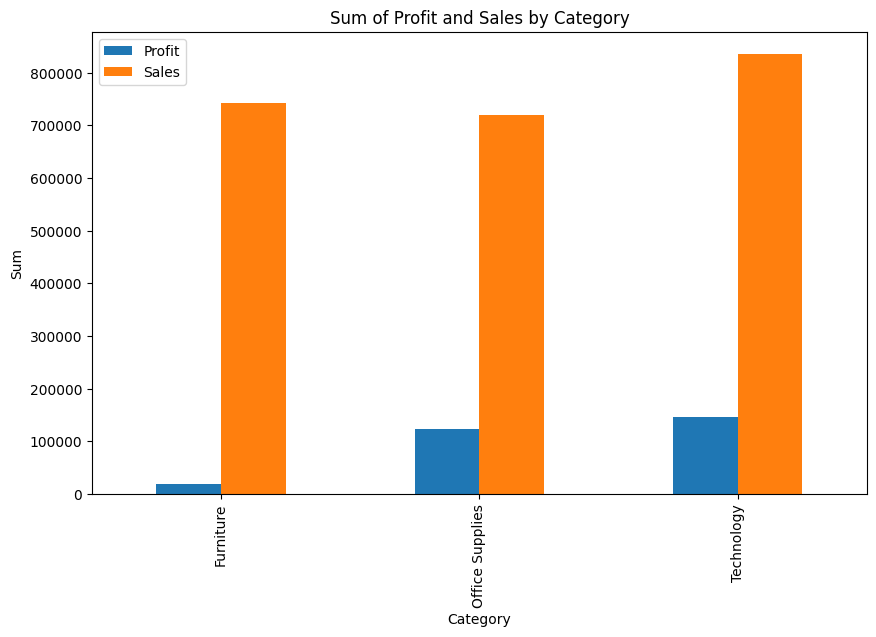

In [27]:
plt.figure(figsize=(10, 6))  # Set the figure size

# Grouping by 'Category' and calculating the sum of 'Profit' and 'Sales'
grouped_data = df.groupby('Category')[['Profit', 'Sales']].sum()
()

# Creating a grouped bar chart
grouped_data.plot(kind='bar', figsize=(10, 6))

plt.ylabel('Sum')
plt.xlabel('Category')
plt.title('Sum of Profit and Sales by Category')
plt.legend(['Profit', 'Sales'])
plt.show()

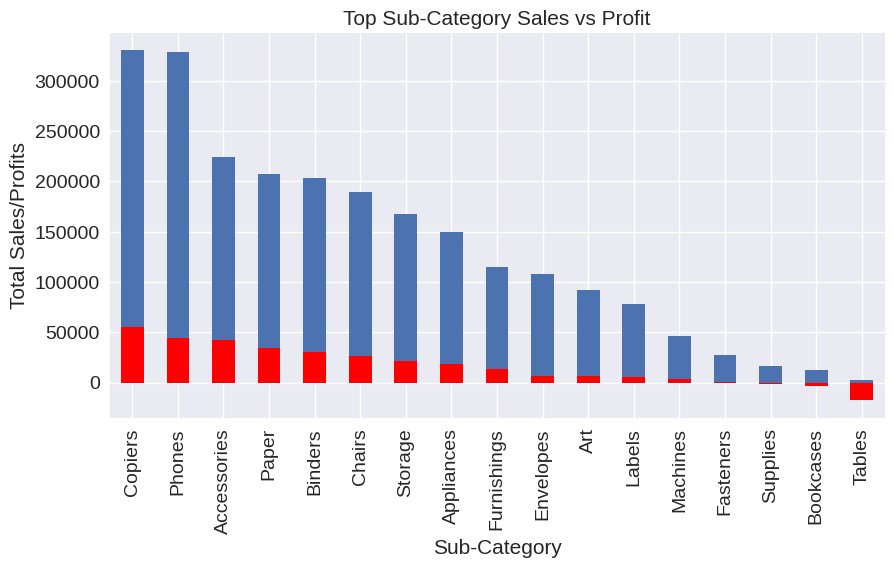

In [28]:
# computing top sub-categories in terms of sales from first 100 observations
top_subcategory_s = df.groupby("Sub-Category").Sales.sum().nlargest(n = 100)
# computing top sub-categories in terms of profit from first 100 observations
top_subcategory_p = df.groupby("Sub-Category").Profit.sum().nlargest(n = 100)

# plotting to see it visually
plt.style.use('seaborn')
top_subcategory_s.plot(kind = 'bar',figsize = (10,5),fontsize = 14)
top_subcategory_p.plot(kind = 'bar',figsize = (10,5),fontsize = 14, color = 'red')
plt.xlabel('Sub-Category',fontsize = 15)
plt.ylabel('Total Sales/Profits',fontsize = 15)
plt.title("Top Sub-Category Sales vs Profit",fontsize = 15)
plt.show()

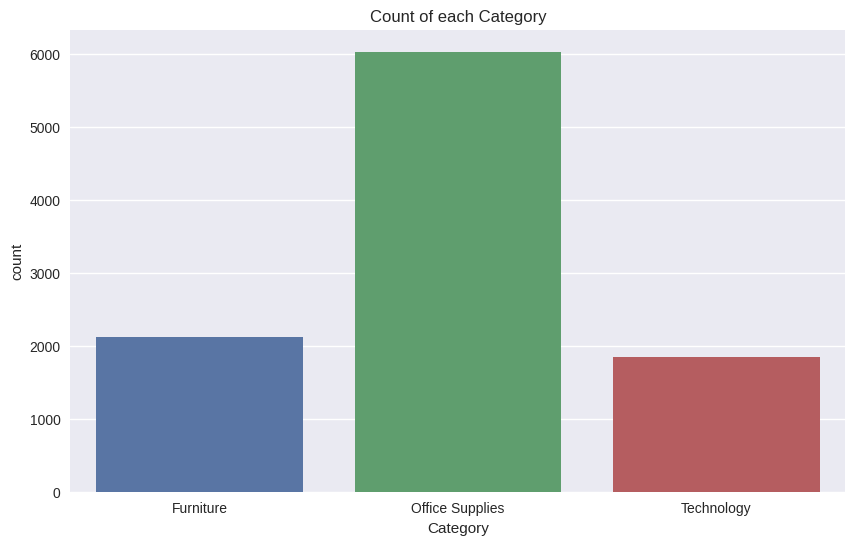

In [29]:
plt.figure(figsize=(10,6))
sns.countplot(x='Category',data = df)
plt.title("Count of each Category")
plt.show();

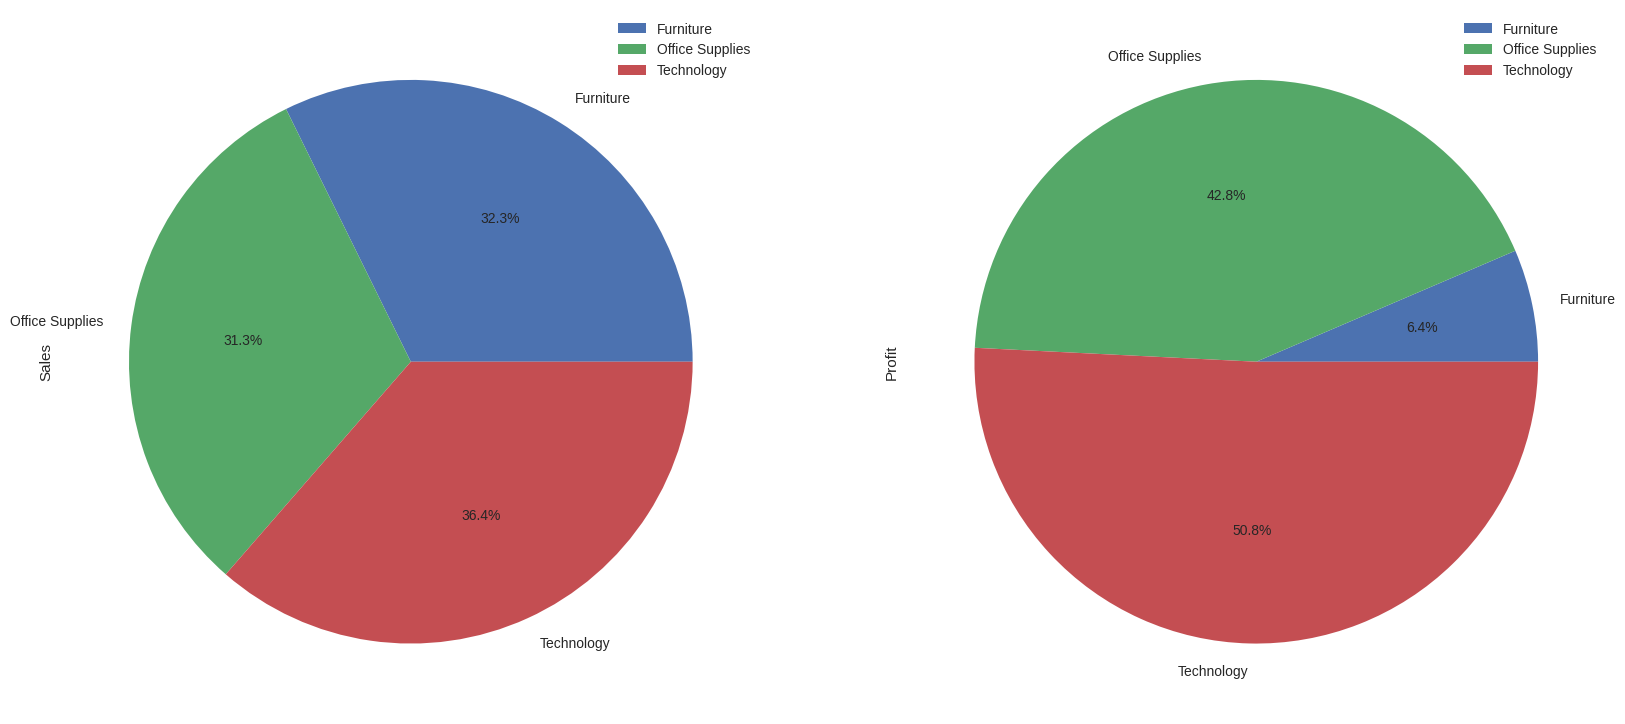

In [31]:
df_categ = df.groupby(['Category']).sum()[['Profit','Sales']]
df_categ[['Sales','Profit']].plot.pie(subplots=True, figsize=(20,10),autopct='%1.1f%%');

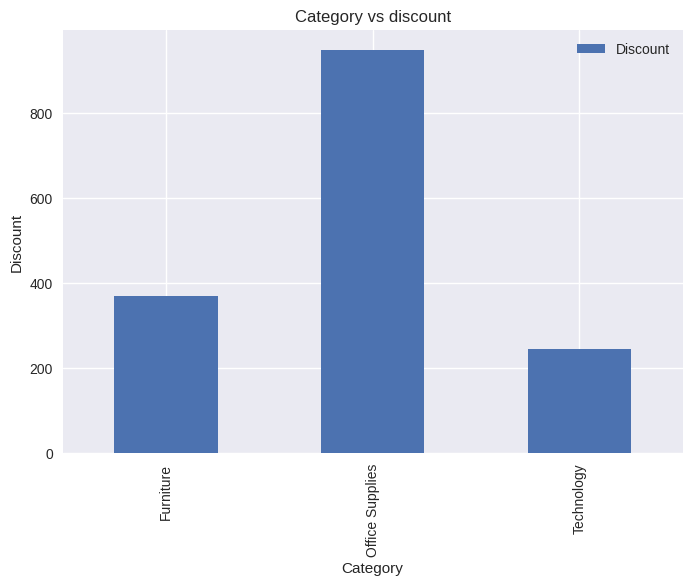

In [32]:
df.groupby(['Category']).sum()[['Discount']].plot.bar()
plt.title("Category vs discount")
plt.ylabel('Discount');

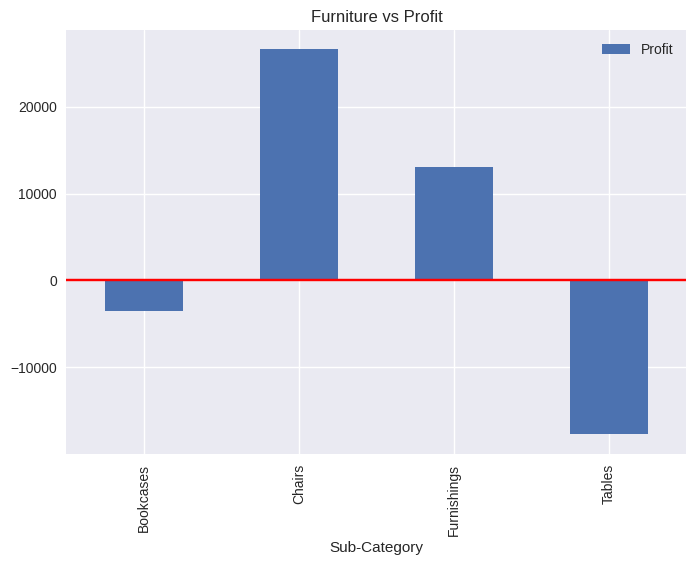

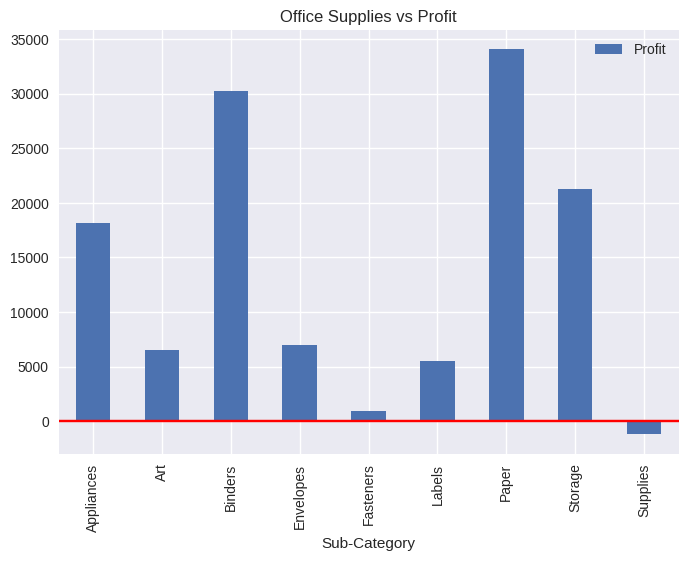

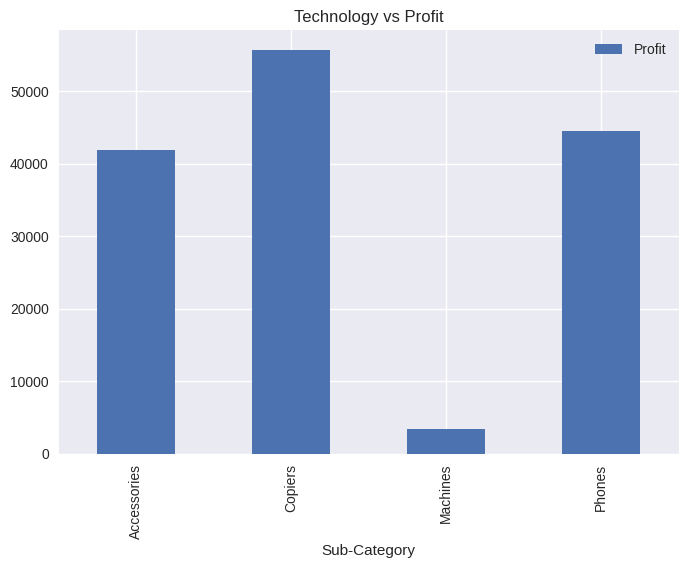

In [33]:
df_Furniture = df.set_index(['Category']).loc['Furniture']
df_Office = df.set_index(['Category']).loc['Office Supplies']
df_Technology = df.set_index(['Category']).loc['Technology']

df_Furniture[['Sub-Category','Profit']].groupby('Sub-Category').sum().plot.bar(title='Furniture vs Profit')
plt.axhline(0,color='r')

df_Office[['Sub-Category','Profit']].groupby('Sub-Category').sum().plot.bar(title='Office Supplies vs Profit')
plt.axhline(0,color='r')

df_Technology[['Sub-Category','Profit']].groupby('Sub-Category').sum().plot.bar(title='Technology vs Profit');

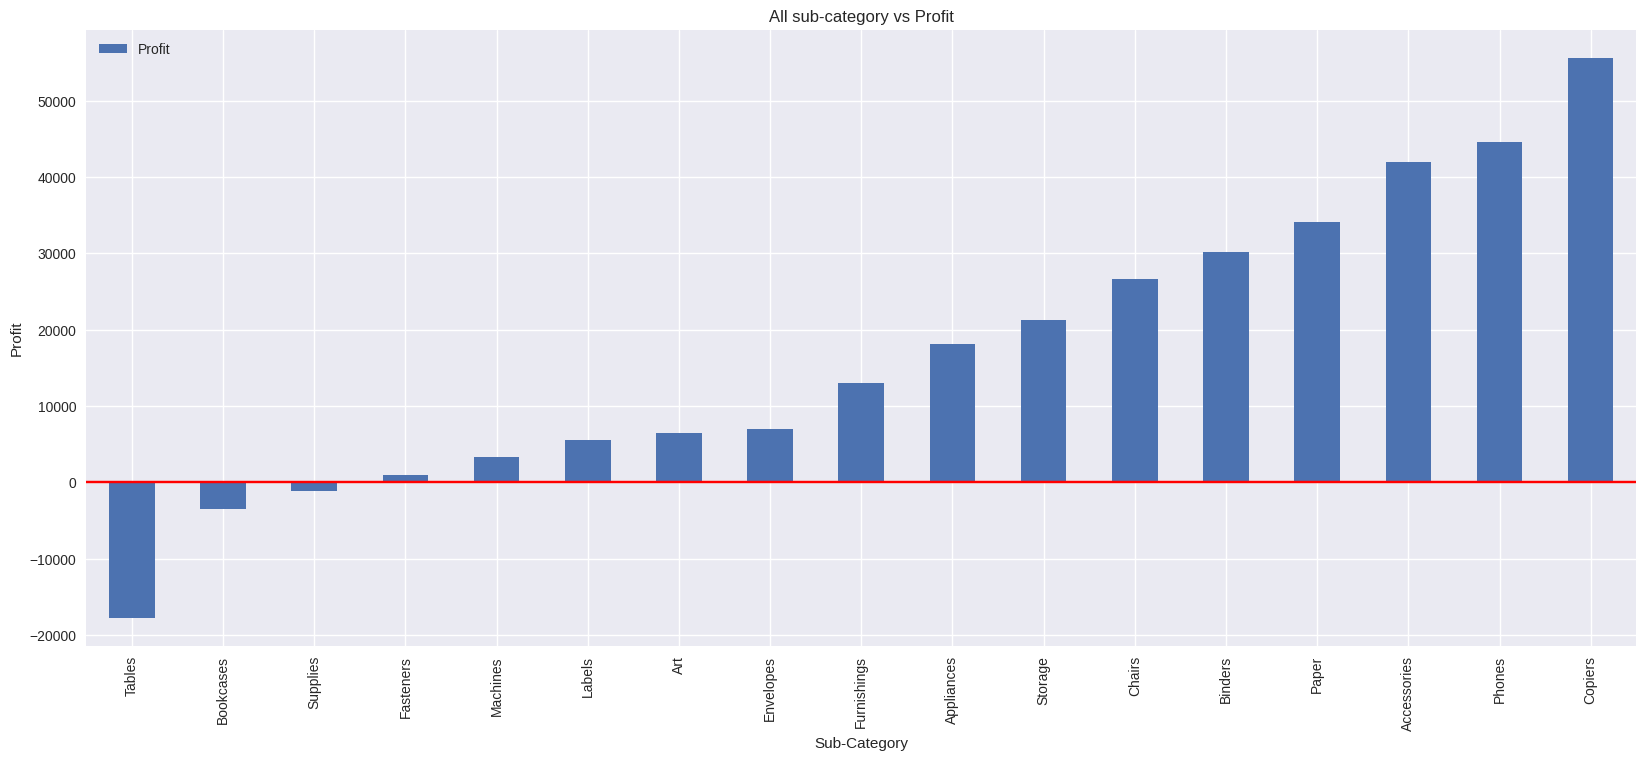

In [34]:
df[['Sub-Category','Profit']].groupby('Sub-Category').sum().sort_values('Profit').plot.bar(figsize=(20,8))
plt.axhline(0,color='r')
plt.title('All sub-category vs Profit')
plt.ylabel('Profit');

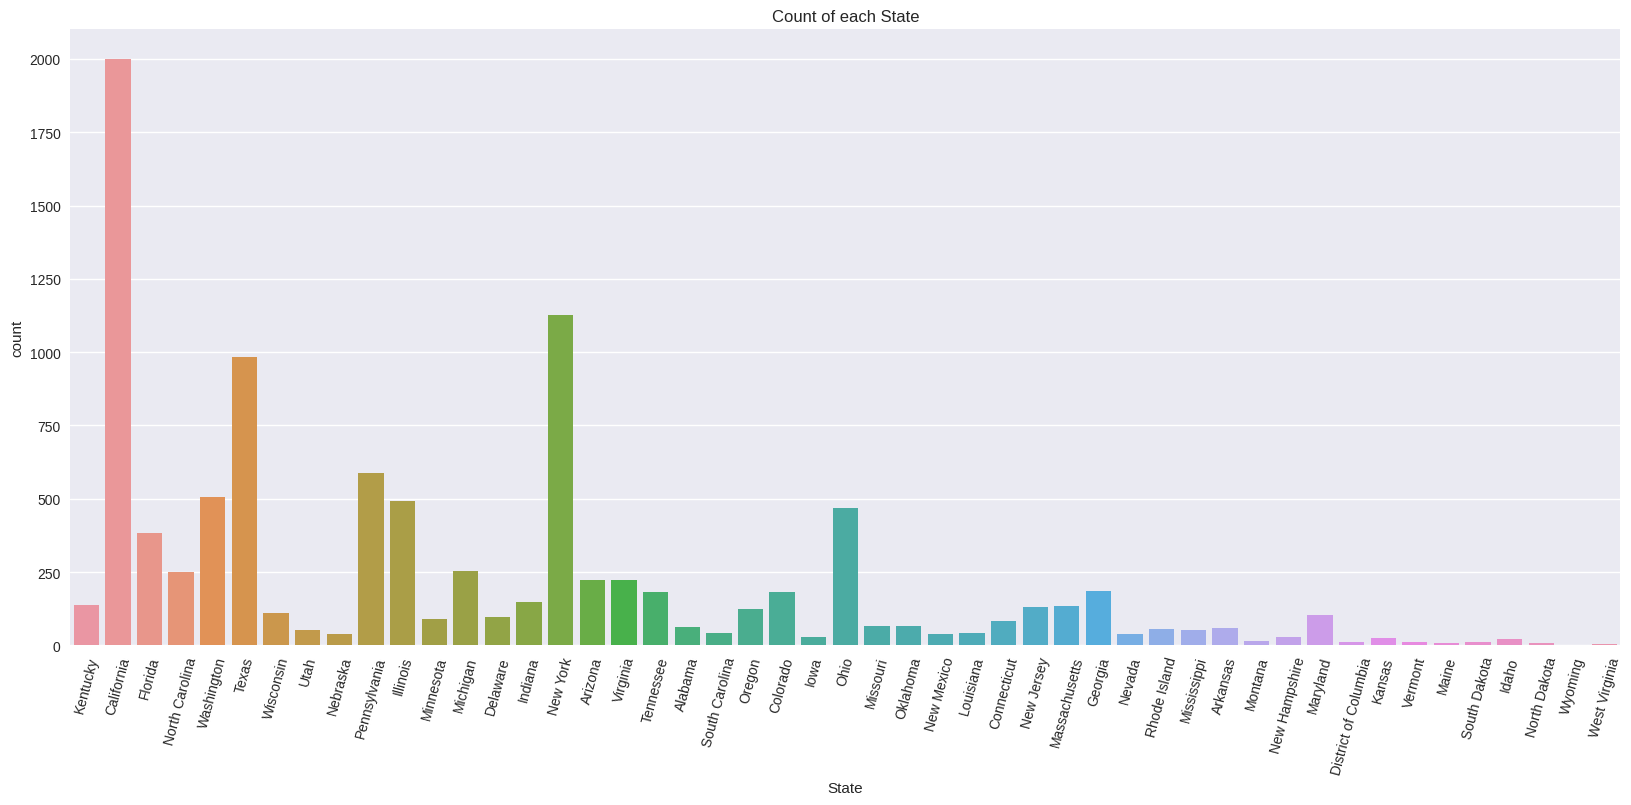

In [35]:
plt.figure(figsize=(20,8))
sns.countplot(data=df,x='State')
plt.xticks(rotation=75)
plt.title('Count of each State')
plt.show()

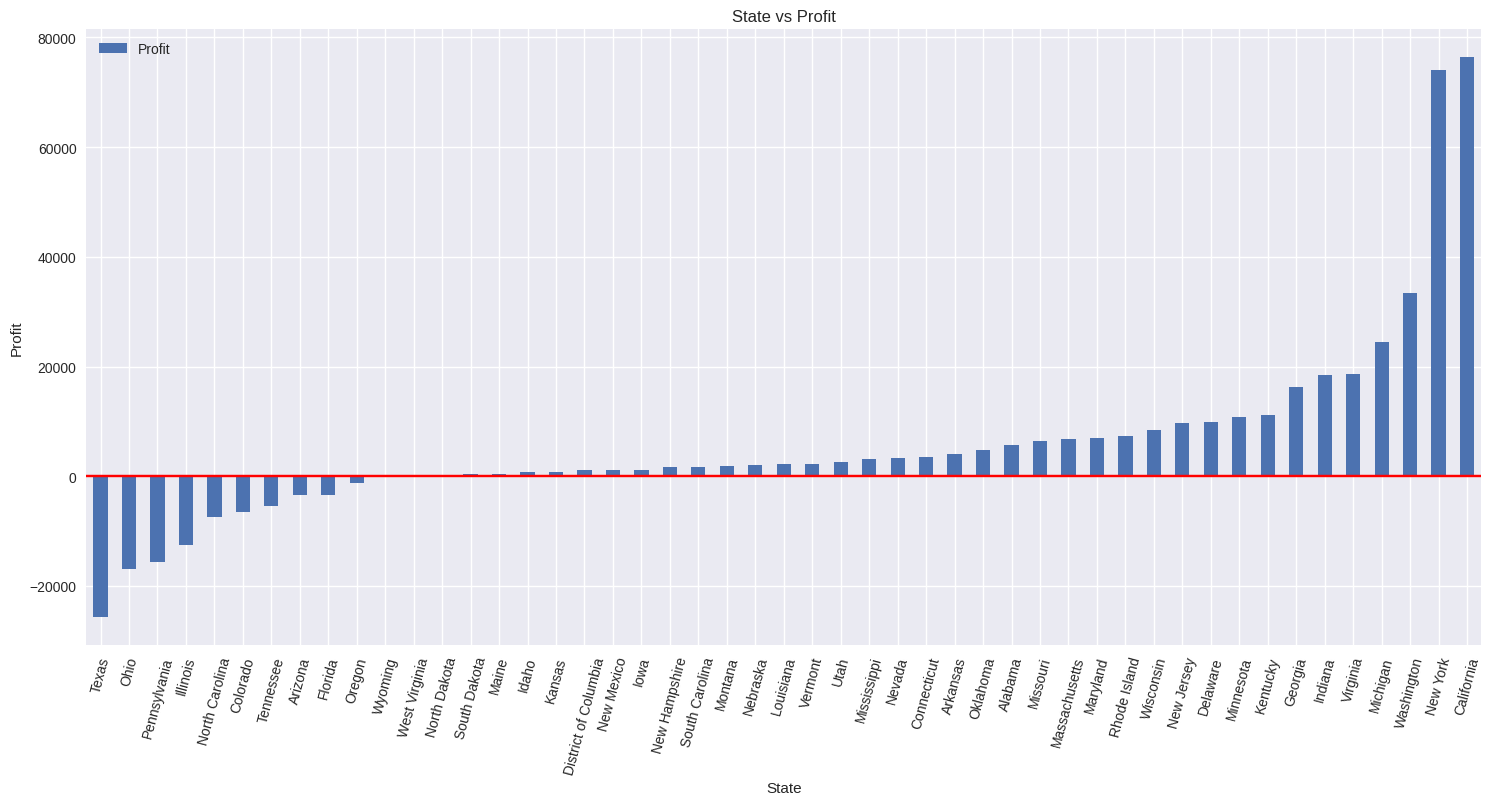

In [36]:
df.groupby(['State']).sum()[['Profit']].sort_values(['Profit']).plot.bar(figsize=(18,8))
plt.ylabel("Profit")
plt.xticks(rotation=75)
plt.axhline(0,color='r')
plt.title('State vs Profit');

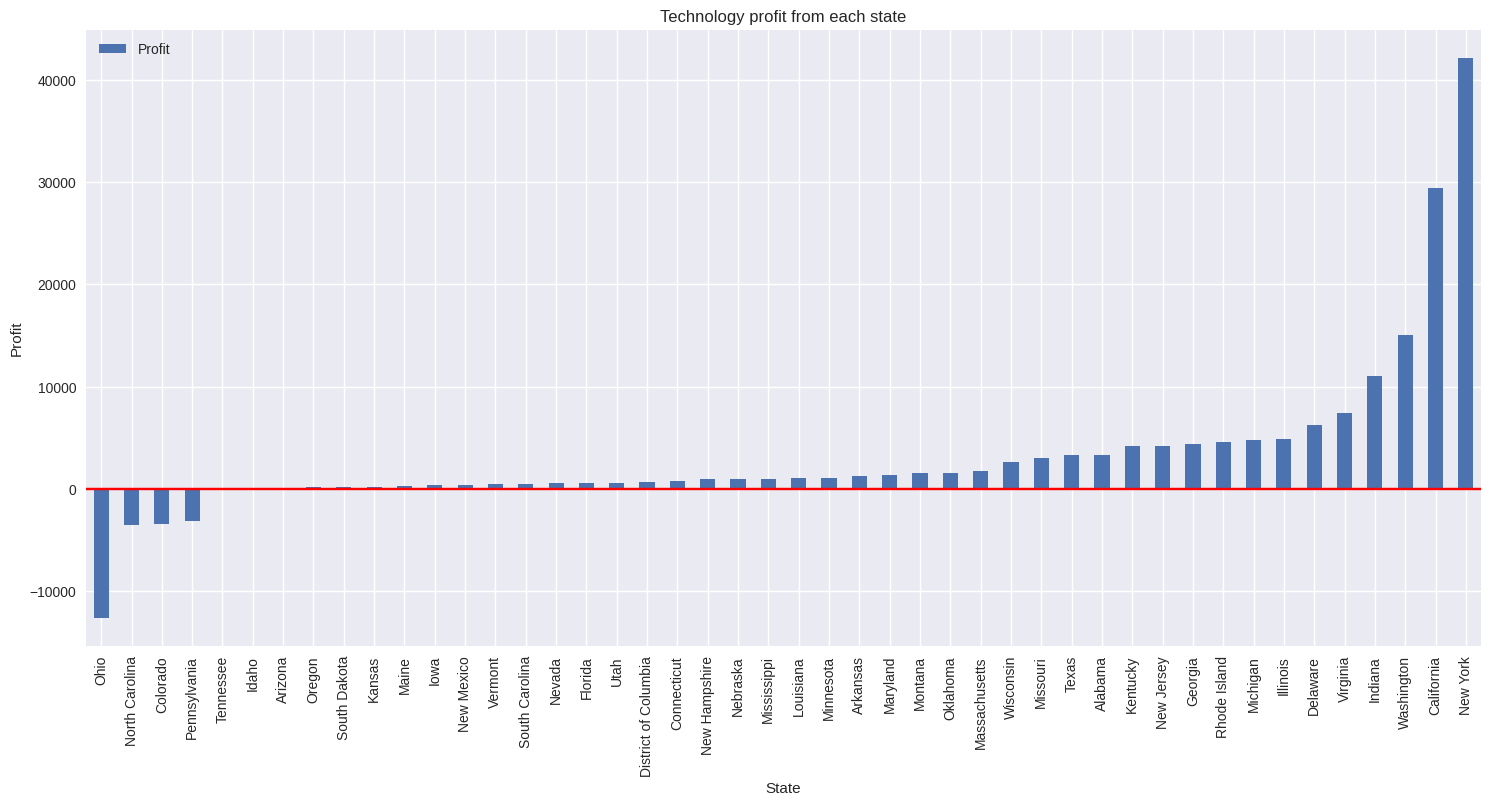

In [37]:
df_Technology.groupby('State').sum()[['Profit']].sort_values('Profit').plot.bar(figsize=(18,8))
plt.axhline(0,color='r')
plt.title('Technology profit from each state')
plt.ylabel('Profit');

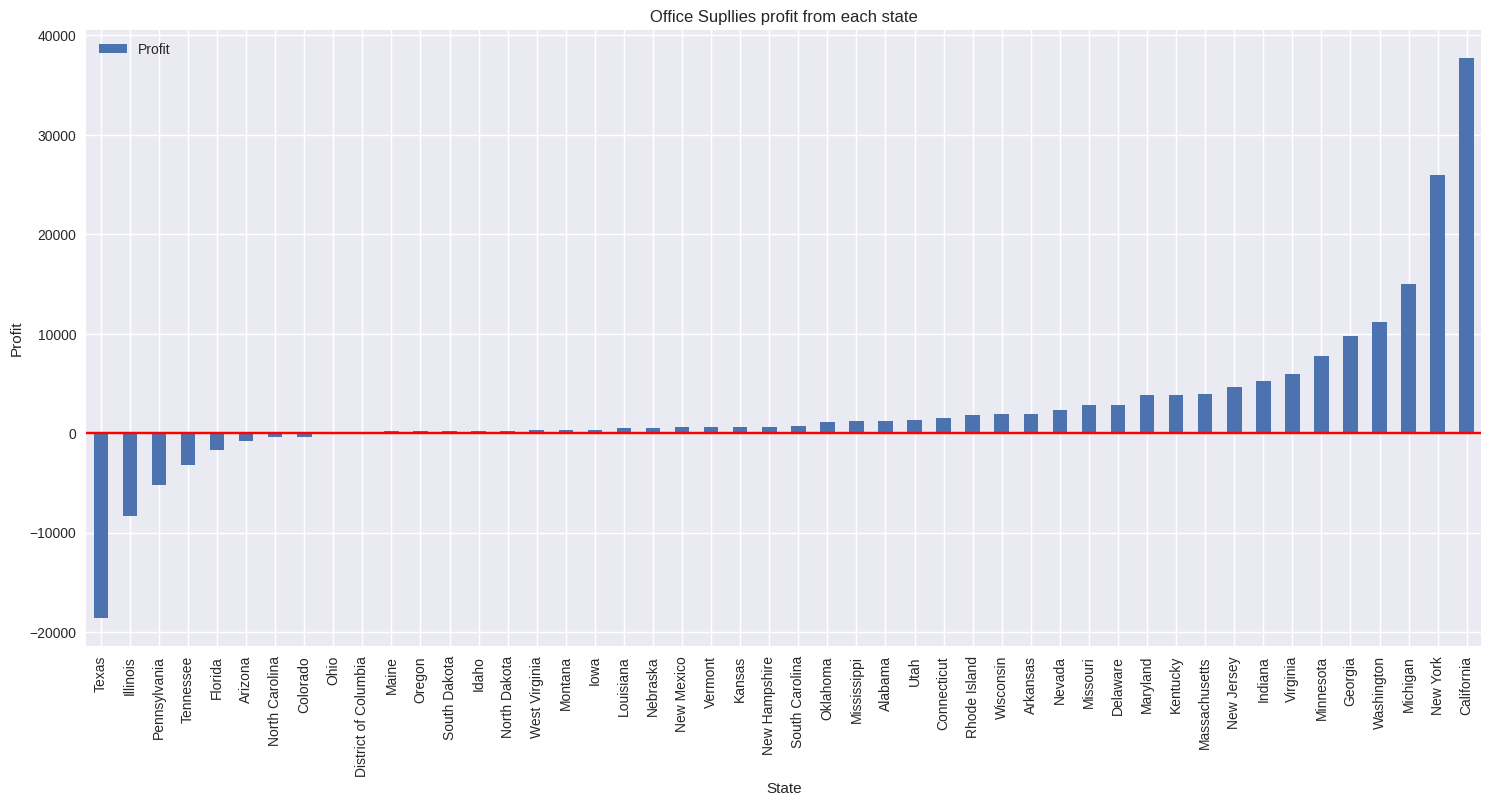

In [38]:
df_Office.groupby('State').sum()[['Profit']].sort_values('Profit').plot.bar(figsize=(18,8))
plt.axhline(0,color='r')
plt.title('Office Supllies profit from each state')
plt.ylabel('Profit');

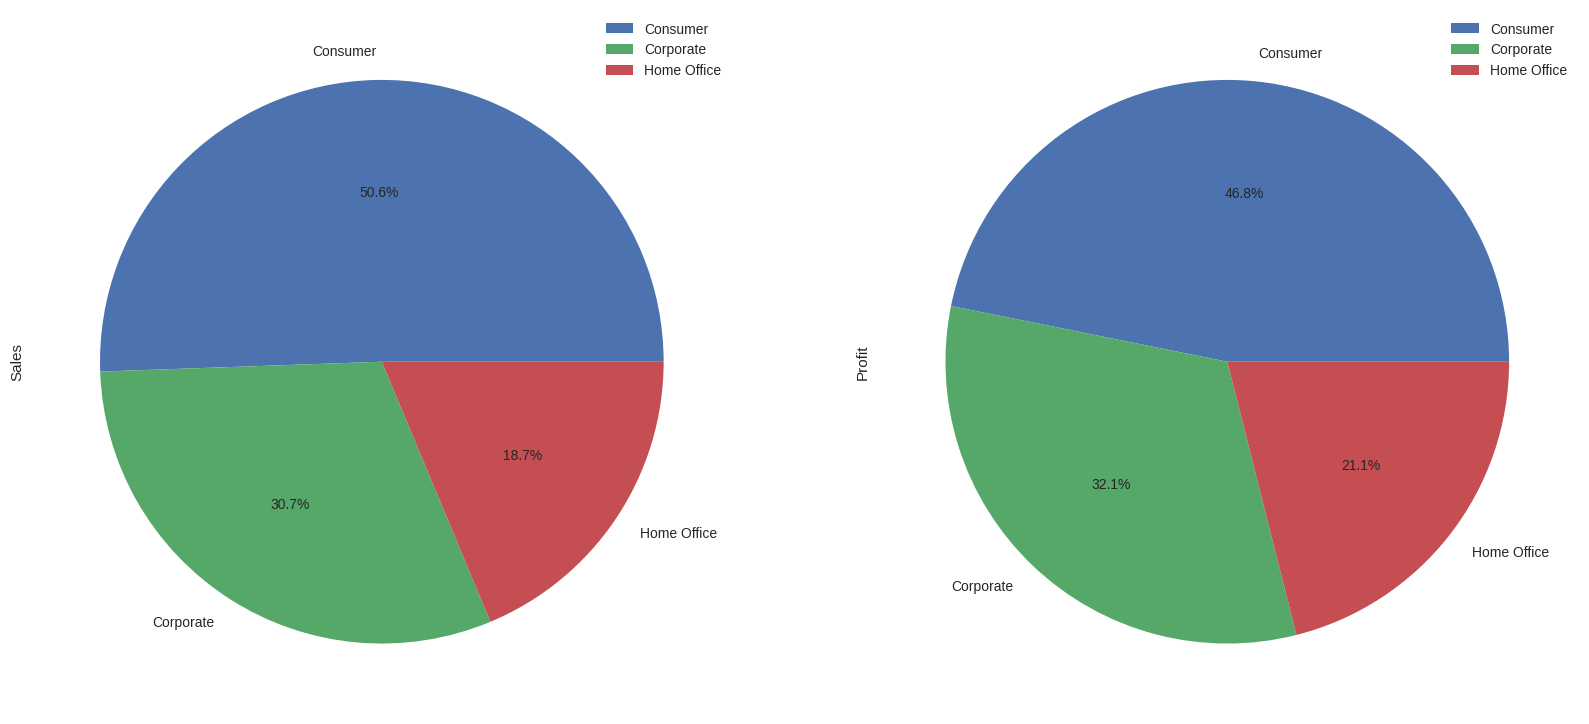

In [39]:
df_categ = df.groupby(['Segment']).sum()[['Profit','Sales']]
df_categ[['Sales','Profit']].plot.pie(subplots=True, figsize=(20,10),autopct='%1.1f%%');

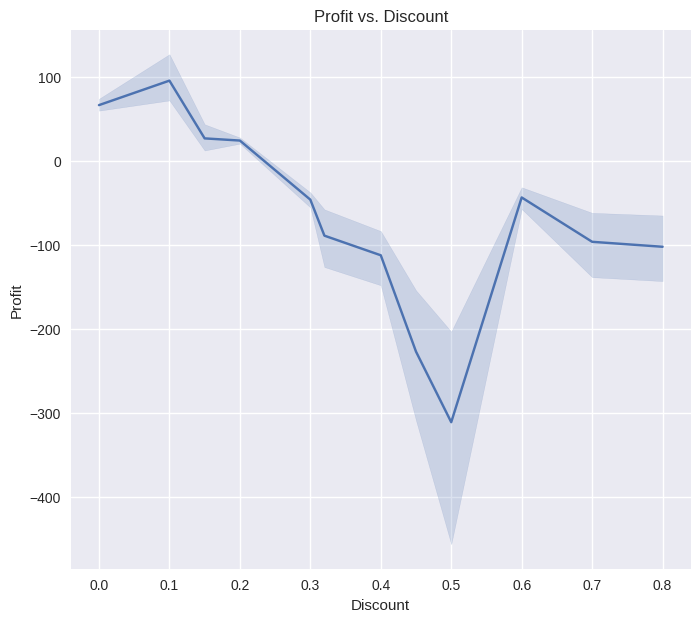

In [40]:
plt.figure(figsize=(8, 7))
sns.lineplot(x=df['Discount'], y=df['Profit'], data=df)
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.title('Profit vs. Discount')
plt.show()

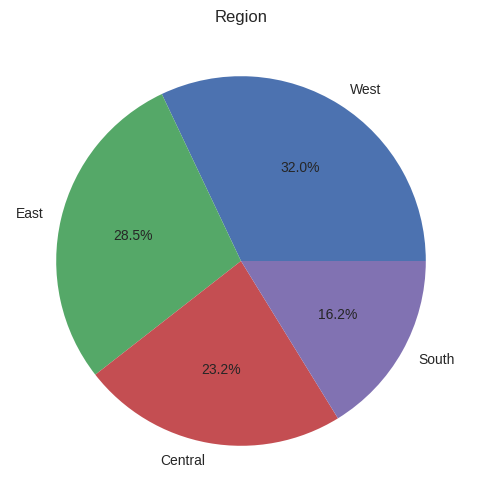

In [41]:
plt.figure(figsize = (6,6))
plt.title('Region')
plt.pie(df['Region'].value_counts(), labels=df['Region'].value_counts().index,autopct='%1.1f%%')
plt.show()

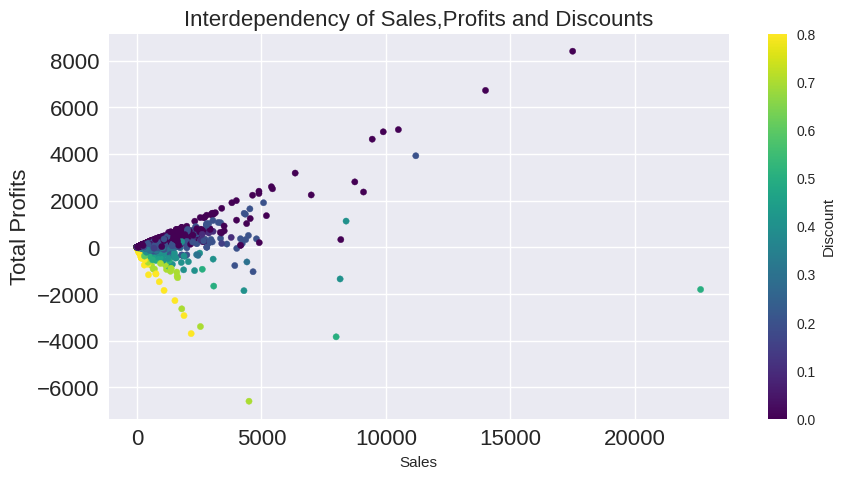

In [42]:
plt.style.use('seaborn')
df.plot(kind = "scatter",figsize = (10,5), x = "Sales", y= "Profit", c = "Discount", s = 20,fontsize = 16, colormap = "viridis")
plt.ylabel('Total Profits',fontsize = 16)
plt.title("Interdependency of Sales,Profits and Discounts",fontsize = 16)

plt.show()

#### Inference :
###### We should combine regions like 'New York'  and 'California' to increase the profit.

###### Increase sales more in the east as profit is more.

###### We should limit sales of furniture and increase that of technology and office suppliers as furniture has very less profit as compared to sales.

###### Considering the sub-categories sales of tables should be minimized.